### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ №1

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:   Леонова Алина
##### Группа:    НФИбд-02-17

### Москва 2020
***

### Вариант №5


***
#### Постановка задачи:
+ Используя функционал библиотеки NumPy, постройте n значений случайных признаков X и Y , имеющих (двумерное) гауссовское распределение с математическим ожиданием a и ковариационной матрицей R .
+ Вычислите и выведите на экран для построенных значений признаков X и Y математические ожидания, дисперсии, а также корреляцию между признаками.
+ Визуализируйте построенные данные на плоскости в виде точек. Визуализируйте математическое ожидание на плоскости в виде точки другого цвета и с другим маркером.

In [1]:
import numpy as np

In [2]:
n = 100
a = [0,1]
R = [[1,-.9],[-.9,2]]
x, y = np.random.multivariate_normal(a, R, n).T
print("X =", x)  
print("Y =", y) 

X = [-1.19178764 -0.51029598 -0.29449762  0.66776054 -0.45283075 -0.2317176
 -0.93418346 -0.26037622  0.95337607  0.40148415 -0.27926381 -1.46280657
 -0.31119434  0.52652363 -0.57119437  0.94968081  0.57868602  0.32335441
  0.4509558  -2.46323187 -1.35394312 -0.38419373 -0.23592298  1.05105329
 -1.72916232  0.60811981 -0.93373937 -0.46253124 -1.08806483 -0.52809037
 -2.85236024  2.33368759 -0.87871124  0.02873442  0.70109552  0.3896181
 -1.85361751  0.02667264  0.96444299  0.13703229  0.2906264   0.45010838
  0.68247018  0.17363227 -1.65536574 -0.02999153  0.19767207 -1.73298327
 -0.74292996  0.55538536  0.49576536 -0.5367569   0.7275122   0.6496276
 -1.05568182 -0.35997246  0.23784604 -0.73621096 -2.09235979 -0.05340851
 -2.50150597 -1.4776184   2.00608652 -1.54534677  0.34433766 -0.91700126
  0.34143188 -0.43403198  0.26491556  1.40351529  0.29859011  0.18515466
  1.73206995 -0.03801949  0.874306    0.51441964 -0.49934582 -0.70094656
  1.55435844 -1.06054336  1.47708022 -1.11334262  

In [3]:
print("Математическое ожидание x =", np.mean(x))        
print("Математическое ожидание y =", np.mean(y))        
print("Дисперсия x =", np.var(x))  
print("Дисперсия y =", np.var(y))  
print("Корреляция между x и y = ", np.corrcoef(x,y)[1,0])
print("Корреляционная матрица:\n", np.corrcoef(x,y))

Математическое ожидание x = -0.09267562386528143
Математическое ожидание y = 1.155500050955174
Дисперсия x = 1.044033371576741
Дисперсия y = 2.6287782046628894
Корреляция между x и y =  -0.6357062555386127
Корреляционная матрица:
 [[ 1.         -0.63570626]
 [-0.63570626  1.        ]]


Text(0, 0.5, 'y')

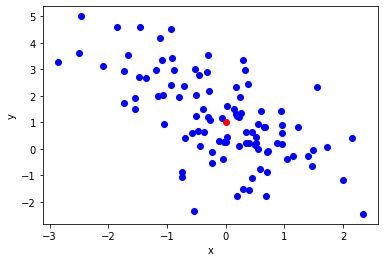

In [4]:
import matplotlib.pyplot as plt

plt.plot(x, y, 'ob')
plt.plot(a[0],a[1], 'or') #мат ожидание
plt.xlabel('x')
plt.ylabel('y')

---
#### Постановка задачи:
+ Используя функционал библиотеки Pandas, cчитайте заданный набор данных из репозитария UCI.
+ Проведите исследование набора данных, выявляя числовые и категориальные признаки.
+ Для числового признака, имеющего наибольшую дисперсию, постройте эмпирическую функцию распределения (CDF) и визуализируйте ее в виде графика на плоскости.
+ Найдите числовой признак, наименее коррелированный с числовым признаком, имеющим наибольшую дисперсию.
+ Для этого признака постройте эмпирическую плотность распределения (PDF) и визуализируйте ее в виде гистограммы.
+ Вычислите и выведите на экран для указанных выше двух признаков математические ожидания, дисперсии, а также корреляцию между признаками.

In [5]:
import pandas as pd

**Заданного в описании вариантов файла не было по данной там ссылке и я решила использовать единственный файл оттуда типа `.data`**  

In [6]:
import pandas as pd

url = \
"https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data"

# read data into pandas data frame
data = pd.read_csv( url, header=None, prefix="V" )

print( "\n*** Начало данных:\n", data.head() )
print( "\n*** Конец данных:\n",  data.tail() )

summary = data.describe() 
print( "\n*** Сводка данных:\n", summary)


*** Начало данных:
   V0     V1     V2 V3 V4 V5 V6    V7 V8 V9  V10 V11 V12    V13  V14 V15
0  b  30.83  0.000  u  g  w  v  1.25  t  t    1   f   g  00202    0   +
1  a  58.67  4.460  u  g  q  h  3.04  t  t    6   f   g  00043  560   +
2  a  24.50  0.500  u  g  q  h  1.50  t  f    0   f   g  00280  824   +
3  b  27.83  1.540  u  g  w  v  3.75  t  t    5   t   g  00100    3   +
4  b  20.17  5.625  u  g  w  v  1.71  t  f    0   f   s  00120    0   +

*** Конец данных:
     V0     V1      V2 V3 V4  V5  V6    V7 V8 V9  V10 V11 V12    V13  V14 V15
685  b  21.08  10.085  y  p   e   h  1.25  f  f    0   f   g  00260    0   -
686  a  22.67   0.750  u  g   c   v  2.00  f  t    2   t   g  00200  394   -
687  a  25.25  13.500  y  p  ff  ff  2.00  f  t    1   t   g  00200    1   -
688  b  17.92   0.205  u  g  aa   v  0.04  f  f    0   f   g  00280  750   -
689  b  35.00   3.375  u  g   c   h  8.29  f  f    0   t   g  00000    0   -

*** Сводка данных:
                V2          V7        V10    

**Выше были высчитаны основные статистические значения для числовых признаков. Признаки V1 и V13 также являются числовыми, но там присутсвуют "?", не хватает значений. Все остальные признаки являются категориальными.**

**Для дальнейшего выполнения работы избавляюсь от нечисловых элементов:**

In [7]:
from pandas import DataFrame
df = DataFrame(data)

dfn = df.apply(pd.to_numeric, args=('coerce',)) 
print(dfn)

     V0     V1      V2  V3  V4  V5  V6    V7  V8  V9  V10  V11  V12    V13  \
0   NaN  30.83   0.000 NaN NaN NaN NaN  1.25 NaN NaN    1  NaN  NaN  202.0   
1   NaN  58.67   4.460 NaN NaN NaN NaN  3.04 NaN NaN    6  NaN  NaN   43.0   
2   NaN  24.50   0.500 NaN NaN NaN NaN  1.50 NaN NaN    0  NaN  NaN  280.0   
3   NaN  27.83   1.540 NaN NaN NaN NaN  3.75 NaN NaN    5  NaN  NaN  100.0   
4   NaN  20.17   5.625 NaN NaN NaN NaN  1.71 NaN NaN    0  NaN  NaN  120.0   
..   ..    ...     ...  ..  ..  ..  ..   ...  ..  ..  ...  ...  ...    ...   
685 NaN  21.08  10.085 NaN NaN NaN NaN  1.25 NaN NaN    0  NaN  NaN  260.0   
686 NaN  22.67   0.750 NaN NaN NaN NaN  2.00 NaN NaN    2  NaN  NaN  200.0   
687 NaN  25.25  13.500 NaN NaN NaN NaN  2.00 NaN NaN    1  NaN  NaN  200.0   
688 NaN  17.92   0.205 NaN NaN NaN NaN  0.04 NaN NaN    0  NaN  NaN  280.0   
689 NaN  35.00   3.375 NaN NaN NaN NaN  8.29 NaN NaN    0  NaN  NaN    0.0   

     V14  V15  
0      0  NaN  
1    560  NaN  
2    824  NaN  

In [8]:
#оставляю только интересующие признаки
dfncut = dfn[['V1','V2','V7','V10','V13','V14']]
print(dfncut)
print(dfncut.describe()) 

        V1      V2    V7  V10    V13  V14
0    30.83   0.000  1.25    1  202.0    0
1    58.67   4.460  3.04    6   43.0  560
2    24.50   0.500  1.50    0  280.0  824
3    27.83   1.540  3.75    5  100.0    3
4    20.17   5.625  1.71    0  120.0    0
..     ...     ...   ...  ...    ...  ...
685  21.08  10.085  1.25    0  260.0    0
686  22.67   0.750  2.00    2  200.0  394
687  25.25  13.500  2.00    1  200.0    1
688  17.92   0.205  0.04    0  280.0  750
689  35.00   3.375  8.29    0    0.0    0

[690 rows x 6 columns]
               V1          V2          V7        V10          V13  \
count  678.000000  690.000000  690.000000  690.00000   677.000000   
mean    31.568171    4.758725    2.223406    2.40000   184.014771   
std     11.957862    4.978163    3.346513    4.86294   173.806768   
min     13.750000    0.000000    0.000000    0.00000     0.000000   
25%     22.602500    1.000000    0.165000    0.00000    75.000000   
50%     28.460000    2.750000    1.000000    0.00000   160


**Наибольшую дисперсию имеет признак, имеющий наибольшее стандартное отклонение. В сводке видно, что std признака V14 значительно превышает остальные, значит предстоит строить CDF для него.**

+ Для числового признака, имеющего наибольшую дисперсию, **постройте эмпирическую функцию распределения (CDF) и визуализируйте ее в виде графика на плоскости.**

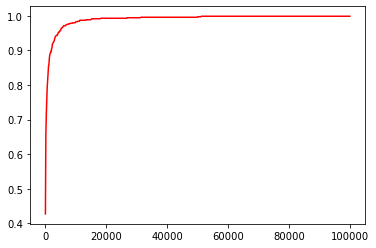

In [9]:
def ECDF(data, x):
    counter = 0.0
    for v in data:
        if v <= x:
            counter += 1
    return counter / len(data)

samples = dfncut['V14']
npoints = len(dfncut)

xlist = [samples.min()+(samples.max()-samples.min())*i/npoints for i in range(0,npoints)]
ylist = [ECDF(samples, x) for x in xlist]

plt.plot(xlist, ylist,'r');

+ Найдите числовой признак, наименее коррелированный с числовым признаком, имеющим наибольшую дисперсию.

In [10]:
print('Корреляция между:')
for t in ('V1','V2','V7','V10','V13'):
        print(f'V14 и {t}:\n', np.corrcoef(dfncut['V14'],dfncut[t]))

Корреляция между:
V14 и V1:
 [[ 1. nan]
 [nan nan]]
V14 и V2:
 [[1.         0.12312115]
 [0.12312115 1.        ]]
V14 и V7:
 [[1.         0.05134493]
 [0.05134493 1.        ]]
V14 и V10:
 [[1.         0.06369244]
 [0.06369244 1.        ]]
V14 и V13:
 [[ 1. nan]
 [nan nan]]


In [14]:
#заменяю nan на среднее значение соответствующего столбца
v1 = dfncut['V1']
av1 = np.mean(v1)
v13 = dfncut['V13']
av13 = np.mean(v13)

dfncut.fillna(value = {'V1':av1, 'V13':av13}, inplace = True)

v14 = dfncut['V14']

#повторяю поиск корреляции
print('Корреляция между:')
print('V14 и V1 = ', np.corrcoef(v14,v1)[1,0])
for t in ('V2','V7','V10'):
        print(f'V14 и {t} = ', np.corrcoef(v14,dfncut[t])[1,0])
print('V14 и V13 = ', np.corrcoef(v14,v13)[1,0] )

Корреляция между:
V14 и V1 =  0.018538807713639634
V14 и V2 =  0.12312115311068293
V14 и V7 =  0.05134492914461604
V14 и V10 =  0.06369243933021197
V14 и V13 =  0.06560933417678688


**Призкак V1 оказался наименее коррелированным с числовым признаком, имеющим наибольшую дисперсию.**
+ Для этого признака постройте эмпирическую плотность распределения (PDF) и визуализируйте ее в виде гистограммы.

Text(0, 0.5, 'PDF')

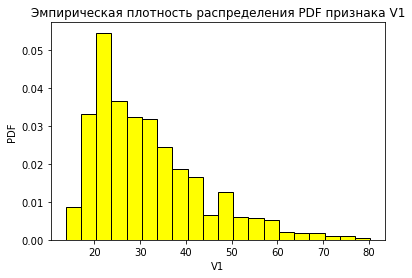

In [15]:
plt.hist(v1, color = 'yellow', edgecolor = 'black', bins = 20, density=True)

plt.title('Эмпирическая плотность распределения PDF признака V1')
plt.xlabel('V1')
plt.ylabel('PDF')

+ Вычислите и выведите на экран для указанных выше двух признаков математические ожидания, дисперсии, а также корреляцию между признаками.

In [16]:
print("Математическое ожидание V14 =", np.mean(v14))        
print("Математическое ожидание V1 =", np.mean(v1))        
print("Дисперсия V14 =",  np.var(v14))  
print("Дисперсия V1 =",  np.var(v1))  
print("Корреляция между V14 и V1 = ", np.corrcoef(v14,v1)[1,0])
print("Корреляционная матрица:\n", np.corrcoef(v14,v1))

Математическое ожидание V14 = 1017.3855072463768
Математическое ожидание V1 = 31.56817109144546
Дисперсия V14 = 27105828.26007988
Дисперсия V1 = 140.29645207558465
Корреляция между V14 и V1 =  0.018538807713639634
Корреляционная матрица:
 [[1.         0.01853881]
 [0.01853881 1.        ]]
